In [1]:
#기초통계 실습
import pandas as pd
import numpy as np

In [3]:
#data set 
data = pd.DataFrame(
    {"score1": [99,65,79,94,87],
     "score2": [79,85,79,93,97],
     "score3": [59,np.nan,39,np.nan,np.nan],
     "weight": [5.43,0.12,10.44,9.33,4.22],
     "diff": [-2.1, 5, 2, -5.4, -3.3],
     "place": ["A","B","A","A","B"]}
    )
data

,score1,score2,score3,weight,diff,place
0,99,79,59.0,5.43,-2.1,A
1,65,85,NaN,0.12,5.0,B
2,79,79,39.0,10.44,2.0,A
3,94,93,NaN,9.33,-5.4,A
4,87,97,NaN,4.22,-3.3,B


In [4]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score1  5 non-null      int64  
 1   score2  5 non-null      int64  
 2   score3  2 non-null      float64
 3   weight  5 non-null      float64
 4   diff    5 non-null      float64
 5   place   5 non-null      object 
dtypes: float64(3), int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
#범주형 변수의 기술통계 정보 확인 ,object type
data.describe(include = 'object')

,place
count,5
unique,2
top,A
freq,3


## 기술통계

In [7]:
# mean
print("한 변수:",data['score1'].mean())

#df 전체평균
print("전체:")
print(data.mean())

한 변수: 84.8
전체:
score1    84.800
score2    86.600
score3    49.000
weight     5.908
diff      -0.760
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_1568\3288533923.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean())


In [8]:
#절사평균
from scipy.stats import trim_mean
print(trim_mean(data['score2'],0.1)) 

86.6


In [9]:
#가중평균
np.average(data['score2'], weights=data['weight'])

86.01760324983074

In [10]:
#중앙값 , 데이터개수 홀수
print(data['score2'].median())

85.0


In [11]:
#중앙값, 짝수
x = [100,600,100,200,400,500]
print(np.median(x))

300.0


In [12]:
#최빈값
data['score2'].mode()

0    79
Name: score2, dtype: int64

In [13]:
#범위
data['score2'].max() - data['score2'].min()

18

In [14]:
#분산
print(data['score2'].var())

66.8


In [15]:
#표준편차
print(data['score2'].std())

8.17312669668102


In [18]:
#사분위수 범위
print(data['score2'].quantile(0.75) - data['score2'].quantile(0.25))

14.0


In [21]:
#변동계수
cv1 = data['score1'].std()/data['score1'].mean()
cv2 = data['score2'].std()/data['score2'].mean()

print('score1의 CV계수: {}'.format(np.round(cv1, 3)))
print('score2의 CV계수: {}'.format(np.round(cv2, 3)))

score1의 CV계수: 0.158
score2의 CV계수: 0.094


In [33]:
#시각화 패키지
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

#한글깨짐
import os
if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"

#값이 깨지는 문제 해결위해 파라미터 설정
sns.set(font=font_family, rc={"axes.unicode_minus": False})

In [34]:
#왜도 산출
from scipy.stats import skew

skew_list1 = [1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,3,4,5]
skew_list2 = [1,2,3,3,4,4,5,5,5,5,6,6,6,6,6,6,6,6]

print(skew(skew_list1))
print(skew(skew_list2))

1.6656293067949786
-1.0422210554570965


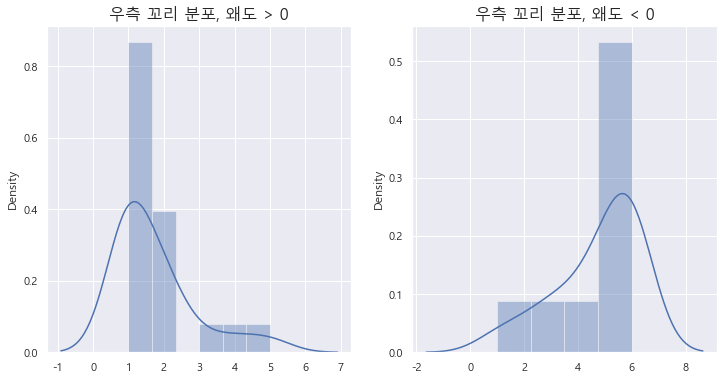

In [38]:
#왜도 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
dis_plot = sns.distplot(skew_list1)
plt.title('우측 꼬리 분포, 왜도 > 0', fontsize=16)

plt.subplot(1,2,2)
dis_plot = sns.distplot(skew_list2)
plt.title('우측 꼬리 분포, 왜도 < 0', fontsize=16)
plt.show()

In [39]:
#첨도 산출
from scipy.stats import kurtosis

kur_list1 = [1,2,3,4,5,6,7,8,9,10]
kur_list2 = [1,2,3,4,5,5,5,5,5,5,5,5,
             5,5,5,5,5,5,5,5,5,5,5,5,
             5,6,7,8,9,10]
print(kurtosis(kur_list1))
print(kurtosis(kur_list2))

-1.2242424242424244
2.351887069895106


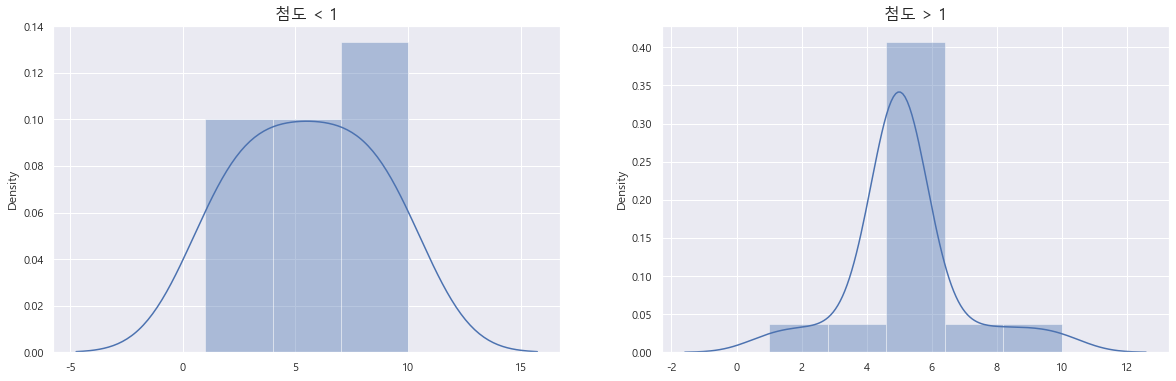

In [40]:
#첨도 시각화
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
dis_plot = sns.distplot(kur_list1)
plt.title('첨도 < 1', fontsize =16)

plt.subplot(1,2,2)
dis_plot = sns.distplot(kur_list2)
plt.title('첨도 > 1', fontsize =16)
plt.show()